In [22]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


In [56]:
# https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def create_svm_and_plot(model, X, y, kernel='linear'):
    
    clf = model.fit(X, y)

    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of {} SVC '.format(kernel))
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y label here')
    ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    # ax.legend()
    plt.show()

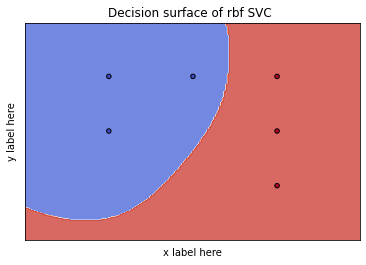

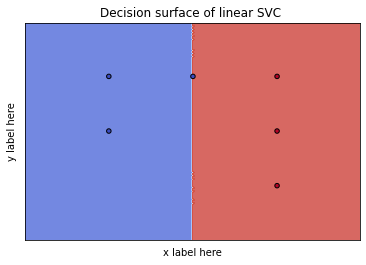

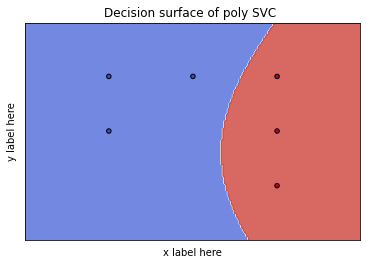

In [38]:

X = np.array([
    np.array([1, 2]),
    np.array([2, 3]),
    np.array([1, 3]),

    np.array([3, 1]),
    np.array([3, 2]),
    np.array([3, 3]),
])

y = [0, 0, 0, 1, 1, 1]

create_svm_and_plot(X, y, 'rbf')
create_svm_and_plot(X, y, 'linear')
create_svm_and_plot(X, y, 'poly')

In [41]:
# https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5
import numpy as np
from numpy import pi

# import matplotlib.pyplot as plt

N = 400
theta = np.sqrt(np.random.rand(N)) * 2 * pi  # np.linspace(0,2*pi,100)

r_a = 2 * theta + pi
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
x_a = data_a + np.random.randn(N, 2)

r_b = -2 * theta - pi
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T
x_b = data_b + np.random.randn(N, 2)

res_a = np.append(x_a, np.zeros((N, 1)), axis=1)
res_b = np.append(x_b, np.ones((N, 1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

array([[-10.7225837 ,   0.54206405,   0.        ],
       [  6.02167467,   9.98278989,   1.        ],
       [ 13.25718145,  -6.21072232,   0.        ],
       ...,
       [  0.90148697, -12.97719091,   0.        ],
       [  1.4597161 , -11.91388636,   0.        ],
       [ -7.29054392,   9.91413002,   1.        ]])

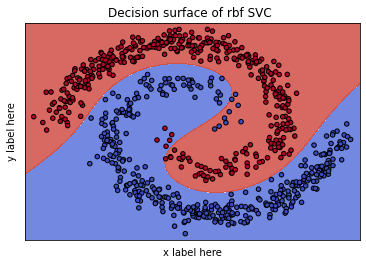

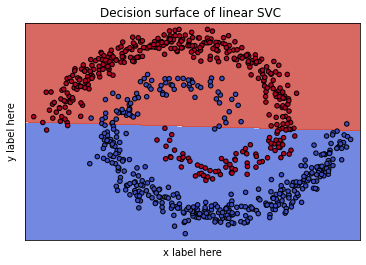

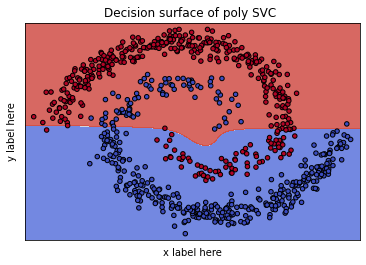

In [57]:
X = res[:, 0:2]
y = res[:, 2]

create_svm_and_plot(svm.SVC(kernel='rbf', C=100), X, y, 'rbf')
create_svm_and_plot(svm.SVC(kernel='linear', C=100), X, y, 'linear')
create_svm_and_plot(svm.SVC(kernel='poly', C=100), X, y, 'poly')

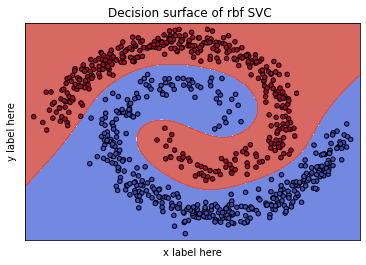

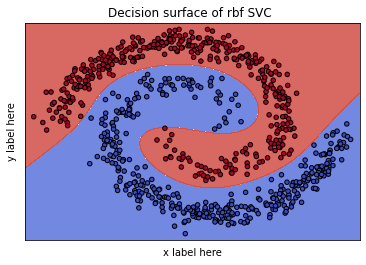

In [62]:
X = res[:, 0:2]
y = res[:, 2]

create_svm_and_plot(svm.SVC(kernel='rbf', gamma=0.01, C=100), X, y, 'rbf')
# create_svm_and_plot(svm.SVC(kernel='linear', C=100), X, y, 'linear')
# create_svm_and_plot(svm.SVC(kernel='poly', C=100), X, y, 'poly')

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use GridSearchCV with C and gamma spaced exponentially far apart to choose good values.

since dataset we selected is completely seperable, we choose a high C argument.

gamma left unchanged, since default obtained best results.

rbf most preffered option for non-linear data.

In [ ]:
create_svm_and_plot(svm.SVC(kernel='poly', degree=30, C=100), X, y, 'poly')
